In [1]:
from neural_network import *

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from scipy.stats import norm

In [2]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

filename = 'model.pt'

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

NN.load(filename)
NN.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
c = 8.3; phi = 31.6; gamma = 15; c_cov = 30; phi_cov = 20; gamma_cov = 7
H = 10; HV = 1/np.tan(35/180*np.pi)

costs={'operation':5, 'escavation':13, 'failure1':20, 'failure2':10000, 'expansion':1.2}

R = NN.run_model([c,phi,gamma,HV,H,c_cov,phi_cov,gamma_cov], costs=costs) 
R

,c,phi,gamma,HV,H,c_cov,phi_cov,gamma_cov,V1,FS,V2,beta,PF,Cost_initial,Cost_fail,Cost_total
0,8.3,31.6,15,1.428148,10,30,20,7,49.095121,1.66709,60.658299,2.667277,0.003823,933.296204,43.800445,977.096649


In [4]:
HVs = np.arange(0.5,2.5,1./16)

n_cases = len(HVs)

#c = 8; phi = 28; gamma = 20; c_cov = 15; phi_cov = 26; gamma_cov = 9; H = 20
c = 8.3; phi = 31.6; gamma = 15; c_cov = 30; phi_cov = 20; gamma_cov = 7; H = 10

data_in = np.tile(np.array([c,phi,gamma,0,H,c_cov,phi_cov,gamma_cov]),(n_cases,1))
data_in[:,3] = HVs

In [5]:
df = NN.run_model(data_in)
df

,c,phi,gamma,HV,H,c_cov,phi_cov,gamma_cov,V1,FS,V2,beta,PF,Cost_initial,Cost_fail,Cost_total
0,8.3,31.6,15.0,0.5000,10.0,30.0,20.0,7.0,-62.654739,1.052174,44.999705,1.041283,1.488722e-01,330.000,1649.502780,1979.502780
1,8.3,31.6,15.0,0.5625,10.0,30.0,20.0,7.0,-51.247118,1.082571,44.236542,1.174919,1.200136e-01,370.625,1327.551370,1698.176370
2,8.3,31.6,15.0,0.6250,10.0,30.0,20.0,7.0,-40.035392,1.113325,43.455738,1.308865,9.529007e-02,411.250,1052.282261,1463.532261
3,8.3,31.6,15.0,0.6875,10.0,30.0,20.0,7.0,-31.983836,1.149188,42.420240,1.447310,7.390508e-02,451.875,814.292523,1266.167523
4,8.3,31.6,15.0,0.7500,10.0,30.0,20.0,7.0,-24.211406,1.185456,41.900928,1.559318,5.946051e-02,492.500,654.399914,1146.899914
5,8.3,31.6,15.0,0.8125,10.0,30.0,20.0,7.0,-16.447831,1.222055,42.109498,1.639533,5.055119e-02,533.125,556.600400,1089.725400
6,8.3,31.6,15.0,0.8750,10.0,30.0,20.0,7.0,-9.285455,1.264599,42.246156,1.723093,4.243584e-02,573.750,467.384478,1041.134478
7,8.3,31.6,15.0,0.9375,10.0,30.0,20.0,7.0,-3.245573,1.310450,42.269861,1.809045,3.522200e-02,614.375,387.951892,1002.326892
8,8.3,31.6,15.0,1.0000,10.0,30.0,20.0,7.0,2.794259,1.356301,42.293566,1.894997,2.904640e-02,655.000,319.947366,974.947366
9,8.3,31.6,15.0,1.0625,10.0,30.0,20.0,7.0,8.834090,1.402153,42.317272,1.980949,2.379849e-02,695.625,262.154998,957.779998


In [6]:
#df.to_csv('sweep.csv', sep=',', index=False)

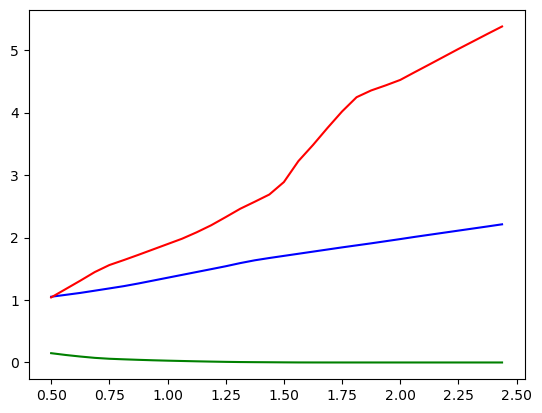

In [7]:
plt.plot(df['HV'],df['FS'],'b')
plt.plot(df['HV'],df['beta'],'r')
plt.plot(df['HV'],df['PF'],'g')

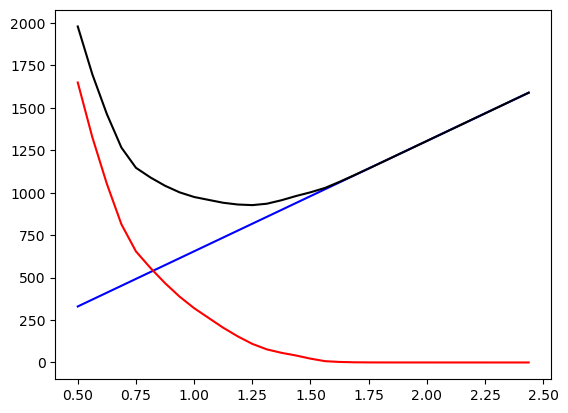

In [8]:
plt.plot(df['HV'],df['Cost_initial'],'b')
plt.plot(df['HV'],df['Cost_fail'],'r')
plt.plot(df['HV'],df['Cost_total'],'k')